### IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
import joblib
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings

#### ANALISANDO DATASET

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


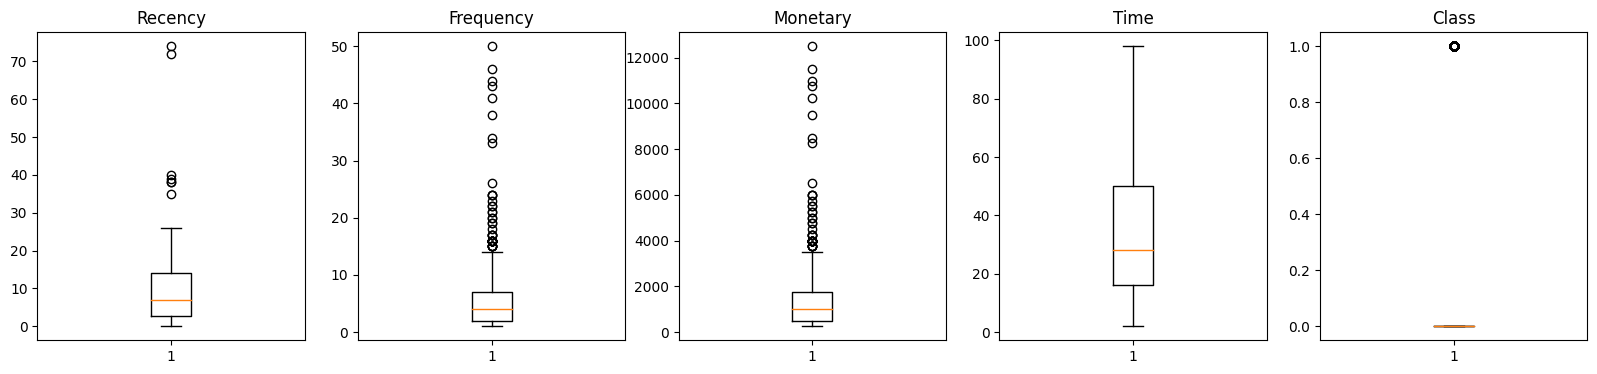

In [2]:
warnings.filterwarnings('ignore')
df = get_data('blood')

plt.figure(figsize=[20,4])

for i, coluna in enumerate(df.columns):
    plt.subplot(1,len(df.columns),i+1)
    plt.boxplot(df[coluna])
    plt.title(coluna)

plt.show()

#### REMOVENDO OUTLIERS

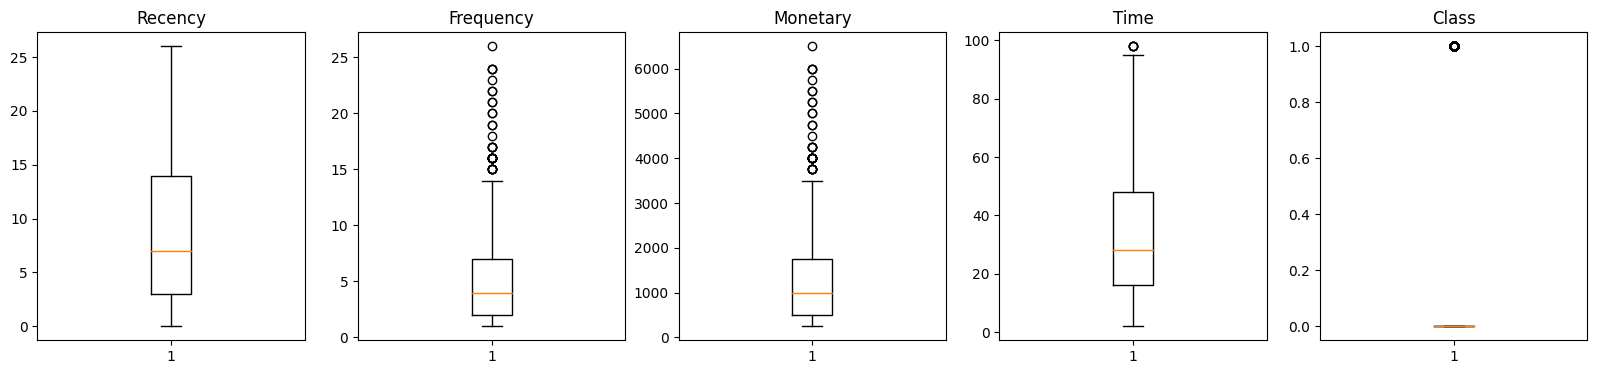

In [3]:
df = df.loc[df['Recency'] < 30]
df = df.loc[df['Frequency'] < 30]

plt.figure(figsize=[20,4])

for i, coluna in enumerate(df.columns):
    plt.subplot(1,len(df.columns),i+1)
    plt.boxplot(df[coluna])
    plt.title(coluna)

plt.show()

#### DEFININDO BASES DE TREINO E DE TESTE

In [4]:
numeric = MinMaxScaler()

X = numeric.fit_transform(df.drop('Class', axis=1))
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(586, 4)
(147, 4)
(586,)
(147,)


#### AVALIANDO MODELOS

RandomForestClassifier(max_depth=5, n_estimators=500)
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       111
           1       0.52      0.31      0.39        36

    accuracy                           0.76       147
   macro avg       0.66      0.61      0.62       147
weighted avg       0.73      0.76      0.74       147



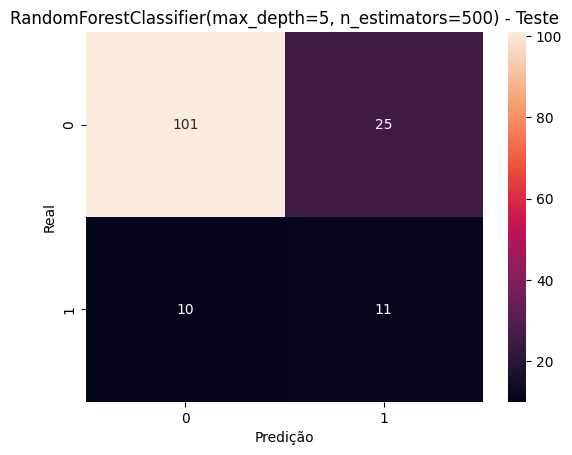

ExtraTreesClassifier(max_depth=5, n_estimators=500)
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       111
           1       0.33      0.03      0.05        36

    accuracy                           0.75       147
   macro avg       0.55      0.50      0.45       147
weighted avg       0.65      0.75      0.66       147



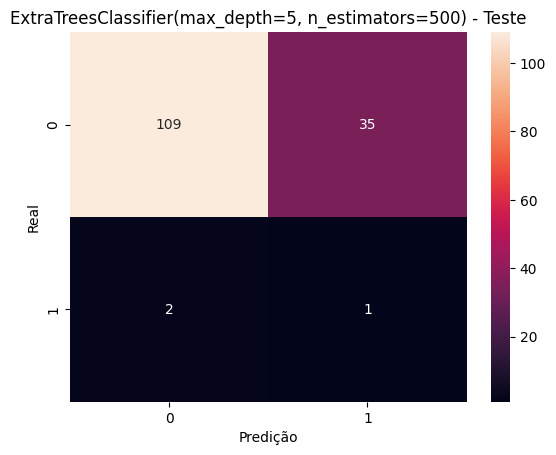

MLPClassifier(solver='lbfgs')
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       111
           1       0.44      0.22      0.30        36

    accuracy                           0.74       147
   macro avg       0.61      0.57      0.57       147
weighted avg       0.70      0.74      0.71       147



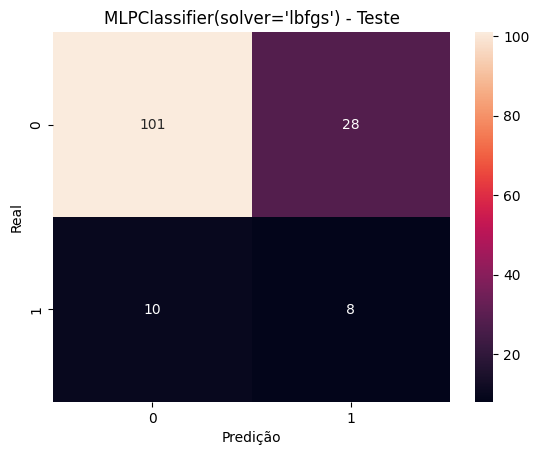

MLPClassifier(solver='sgd')
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       111
           1       0.00      0.00      0.00        36

    accuracy                           0.76       147
   macro avg       0.38      0.50      0.43       147
weighted avg       0.57      0.76      0.65       147



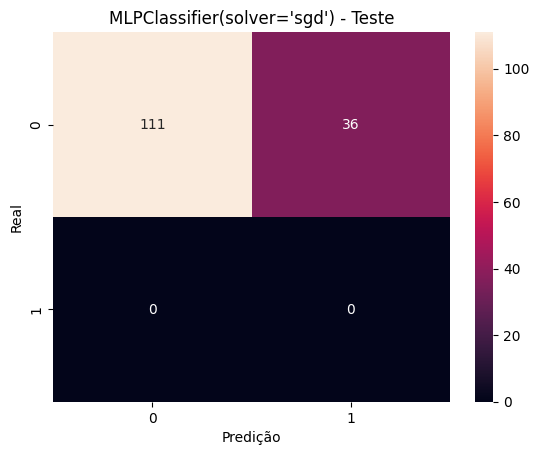

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       111
           1       0.53      0.28      0.36        36

    accuracy                           0.76       147
   macro avg       0.66      0.60      0.61       147
weighted avg       0.73      0.76      0.73       147



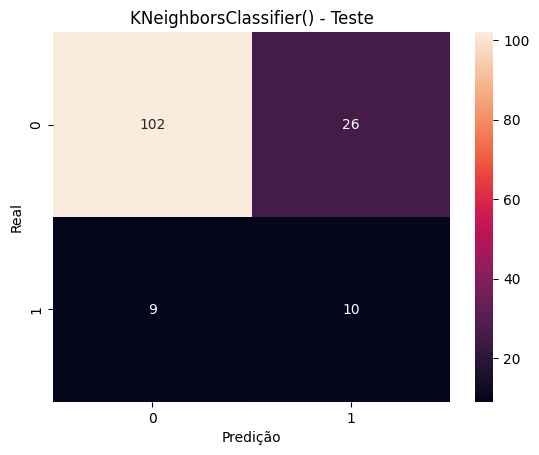

GaussianNB()
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       111
           1       0.50      0.22      0.31        36

    accuracy                           0.76       147
   macro avg       0.64      0.58      0.58       147
weighted avg       0.72      0.76      0.72       147



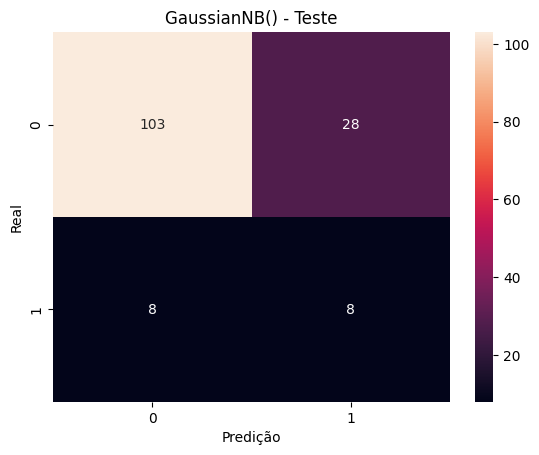

SVC(kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       111
           1       0.34      0.28      0.31        36

    accuracy                           0.69       147
   macro avg       0.56      0.55      0.56       147
weighted avg       0.67      0.69      0.68       147



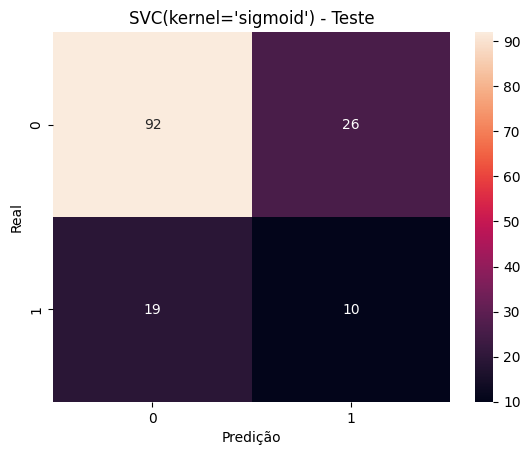

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       111
           1       0.44      0.22      0.30        36

    accuracy                           0.74       147
   macro avg       0.61      0.57      0.57       147
weighted avg       0.70      0.74      0.71       147



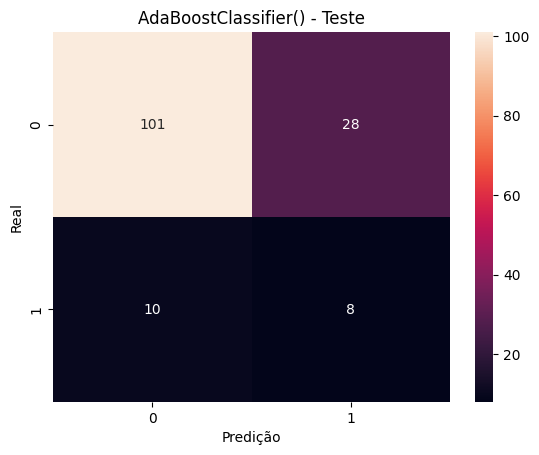

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       111
           1       0.25      0.11      0.15        36

    accuracy                           0.70       147
   macro avg       0.50      0.50      0.49       147
weighted avg       0.63      0.70      0.66       147



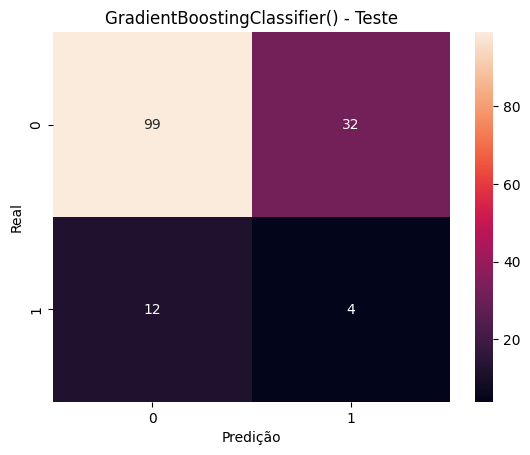

HistGradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       111
           1       0.33      0.25      0.29        36

    accuracy                           0.69       147
   macro avg       0.55      0.54      0.55       147
weighted avg       0.67      0.69      0.68       147



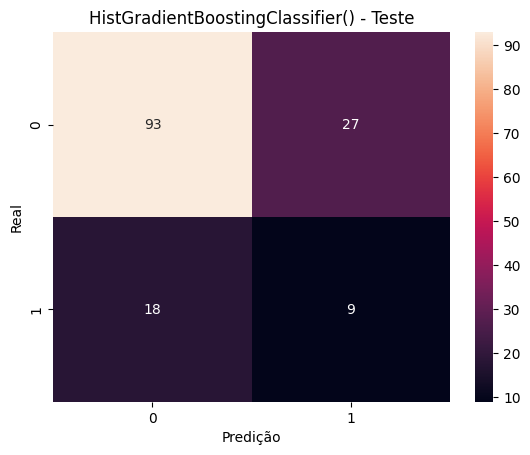

DecisionTreeClassifier(max_depth=5)
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       111
           1       0.33      0.14      0.20        36

    accuracy                           0.72       147
   macro avg       0.55      0.52      0.51       147
weighted avg       0.66      0.72      0.68       147



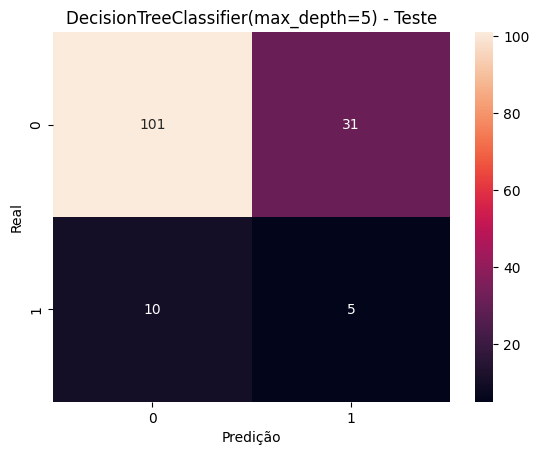

,Modelo,Acuracia
0,"(DecisionTreeClassifier(max_depth=5, max_featu...",76.19
4,KNeighborsClassifier(),76.19
3,MLPClassifier(solver='sgd'),75.51
5,GaussianNB(),75.51
1,"(ExtraTreeClassifier(max_depth=5, random_state...",74.83
2,MLPClassifier(solver='lbfgs'),74.15
7,"(DecisionTreeClassifier(max_depth=1, random_st...",74.15
10,DecisionTreeClassifier(max_depth=5),72.11
8,([DecisionTreeRegressor(criterion='friedman_ms...,70.07
6,SVC(kernel='sigmoid'),69.39


In [5]:
models = [RandomForestClassifier(max_depth=5, n_estimators=500),
          ExtraTreesClassifier(max_depth=5, n_estimators=500),
          MLPClassifier(solver='lbfgs'),
          MLPClassifier(solver='sgd'),
          KNeighborsClassifier(n_neighbors=5),
          GaussianNB(),
          SVC(kernel='sigmoid'),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          HistGradientBoostingClassifier(),
          DecisionTreeClassifier(max_depth=5)
          ]

lista_modelos = []

for model in models:
    model.fit(X_train, y_train)
    teste = model.predict(X_test)

    acuracia = np.round(accuracy_score(y_test, teste)*100,2)

    lista_modelos.append((model, acuracia))

    print(model)
    print(classification_report(y_test, teste))

    sns.heatmap(confusion_matrix(teste, y_test), annot=True, fmt='.0f')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title(str(model) + ' - Teste')

    plt.show()

result = pd.DataFrame(lista_modelos, columns=['Modelo', 'Acuracia'])
result = result.sort_values('Acuracia', ascending=False)
display(result)

#### AJUSTANDO HIPERPARÂMETROS

In [6]:
def testar(folds):
    n_estimators = folds.suggest_int('n_estimators', 50,600)
    max_depth = folds.suggest_int('max_depth', 1,15)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(testar, n_trials=50)

best_params = study.best_params
best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)
print(best_model.score(X_train, y_train))

[I 2024-01-31 15:16:43,874] A new study created in memory with name: no-name-41820e44-0715-49bd-9620-53c9fad9f77f
[I 2024-01-31 15:16:46,104] Trial 0 finished with value: 0.7645516442126612 and parameters: {'n_estimators': 569, 'max_depth': 8}. Best is trial 0 with value: 0.7645516442126612.
[I 2024-01-31 15:16:47,392] Trial 1 finished with value: 0.7679269882659713 and parameters: {'n_estimators': 332, 'max_depth': 1}. Best is trial 1 with value: 0.7679269882659713.
[I 2024-01-31 15:16:48,789] Trial 2 finished with value: 0.7679269882659713 and parameters: {'n_estimators': 408, 'max_depth': 2}. Best is trial 1 with value: 0.7679269882659713.
[I 2024-01-31 15:16:50,437] Trial 3 finished with value: 0.7577140373750544 and parameters: {'n_estimators': 579, 'max_depth': 9}. Best is trial 1 with value: 0.7679269882659713.
[I 2024-01-31 15:16:50,787] Trial 4 finished with value: 0.7474576271186442 and parameters: {'n_estimators': 217, 'max_depth': 11}. Best is trial 1 with value: 0.76792698

0.8191126279863481


#### SALVANDO MODELO

In [7]:
joblib.dump(best_model,r'best_model.pkl')
joblib.dump(numeric,r'numeric.joblib')

['numeric.joblib']

#### CARREGANDO MODELO

In [8]:
best_model = joblib.load(r'best_model.pkl')
numeric = joblib.load(r'numeric.joblib')